# 0 Utils

In [1]:
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

# 1 Dataset

In [3]:
personas = pd.read_csv('..\\..\\Datos\\personas_cotizacion2.csv',encoding = "ISO-8859-1")
# personas = pd.read_csv(data_directory+'personas.csv')
personas = personas.drop(personas.columns[0], axis=1)
personas = personas.drop(['rut'], axis=1)
# personas['negocio'] = []
personas.head(2)

personas.shape

personas.columns

p_negocio = personas.negocio
personas = personas.drop('negocio',axis=1)
print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

personas = personas.drop(['max_rango_edad'],axis=1)
personas.shape

personas.describe()

(6184, 30)
(6184,)


,mean_cot_bod,mean_cot_depto,mean_cot_esta,mean_cot_estu,nro_cot_bod,nro_cot_depto,nro_cot_esta,nro_cot_estu,nro_proyectos,Altos del Valle,...,loc_provincia_Otro,loc_provincia_Santiago,loc_region_Bio-Bio,loc_region_Metropolitana,loc_region_Otro,sexo_Femenino,sexo_Masculino,sexo_Sin Información,tipo_cliente_Jurídico,tipo_cliente_Natural
count,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,...,6184.00000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000
mean,0.133860,0.996063,0.279258,0.001385,0.351714,2.666397,0.699709,0.004528,1.058862,0.080207,...,0.06727,0.039133,0.928202,0.040427,0.031371,0.398771,0.580207,0.021022,0.004366,0.995634
std,0.327317,0.081526,0.426779,0.032708,1.110579,2.596878,1.450089,0.100035,0.260809,0.473837,...,0.25051,0.193928,0.258174,0.196974,0.174333,0.489685,0.493565,0.143469,0.065937,0.065937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.666667,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,19.000000,45.000000,18.000000,4.000000,5.000000,10.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlacion 

In [8]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
corr_p = personas.corr(method='pearson')

import seaborn as sns
f = plt.figure(figsize=(20,10))
g = sns.heatmap(corr_p, annot=True).get_figure()
g.savefig('img\\time_series_corr.png')

In [9]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
personas_vt = vt.fit_transform(personas)

In [10]:
print(personas_vt.shape)
print(vt.variances_)

(6184, 41)
[3.86592115e-03 3.46103495e-02 3.22369291e-03 1.68261708e-01
 1.21009373e-01 0.00000000e+00 0.00000000e+00 1.04605279e-01
 1.07119169e-01 6.64540086e-03 1.82111084e-01 1.06965040e-03
 1.23318594e+00 6.74268715e+00 2.10241906e+00 1.00053721e-02
 6.80100882e-02 2.24485339e-01 1.38244627e+00 6.57895046e+00
 1.03303582e+00 6.27199161e-01 5.78758521e-03 1.99600145e-02
 2.12470336e-01 7.70171824e-03 2.47435428e-02 1.55962096e-02
 8.47309294e-02 8.65596063e-03 6.77494314e-02 5.26767059e-02
 9.50818914e-02 6.27450718e-02 3.76018361e-02 6.66432089e-02
 3.87925732e-02 3.03871235e-02 2.39752694e-01 2.43566839e-01
 2.05800681e-02 4.34704320e-03 4.34704320e-03]


# 3 Supervised Learning: Classification

## 3.1 Libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

## 3.2 Ready the Dataset

In [5]:
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (6184, 44)
Personas que hicieron Negocio:  (407,)
Personas que no Hicieorn Negocio:  (5777,)


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# transformer = SelectKBest(score_func=chi2,k=10)
# Xt_chi2 = transformer.fit_transform(X,y)
# print(Xt_chi2.shape)
# print(transformer.scores_)

## 3.3Train & Test

In [6]:
X = personas
y = p_negocio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(4328, 44) (1856, 44) (4328,) (1856,)


## 3.4 Help Functions

In [7]:
# Import necessary modules
def roc_curve_plot(model, X_test, y_test):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [8]:
def plot_confusion_matrix(model,X,y,y_pred):
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,5))
    sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Acc: {0}'.format(model.score(X, y))
    plt.title(all_sample_title, size = 10);
    plt.show()

In [9]:
def plot_importance_graph(model):
    features = personas.columns
    
    feature_importance = model.best_estimator_.feature_importances_ 
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(feature_importance, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(feature_importance))
    bar_width = 0.5
    rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.show()

## 3.5 Models

### 3.5.1 KNeighbors

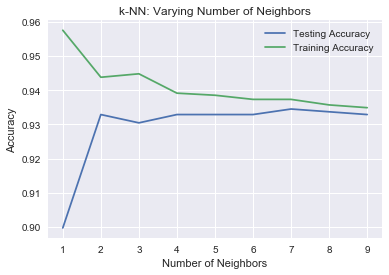

In [218]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [229]:
X = MinMaxScaler().fit_transform(X)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier()

# Param Grid
param_grid = {'n_neighbors': np.arange(1, 10)}

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch
knn_cv = GridSearchCV(knn, param_grid, cv=kf, n_jobs=-1)

# Fit the classifier to the training data
knn_cv.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn_cv.predict(X_test)

print("Acc: ", knn_cv.score(X_test,y_test))
print("Best Params: ", knn_cv.best_params_)
print('Best Estimator: ', knn_cv.best_estimator_)

acc = np.mean(y == y_pred) * 100
print("Acc %: ", acc)

# Confusion Matrix
plot_confusion_matrix(knn_cv,X_test,y_test,y_pred)

#ROC Curve
roc_curve_plot(knn_cv, X_test, y_test)

# Grid Scores
print(knn_cv.grid_scores_)

Acc:  0.9329021827000809
Best Params:  {'n_neighbors': 6}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


ValueError: Lengths must match to compare

## PCA + KNN

TN -> 81:
[('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)),
('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform'))]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.7s finished


Best score: 0.930
Best parameters set:  {'memory': None, 'steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))], 'pca': PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 6, 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'clf__algorithm': 'auto', 'clf__leaf_size': 30, 'clf__metric': 'minkowski', 'clf__metric_params': None, 'clf__n_jobs': 1, 'clf__n_neighbors': 5, 'clf__p': 2, 'clf__wei

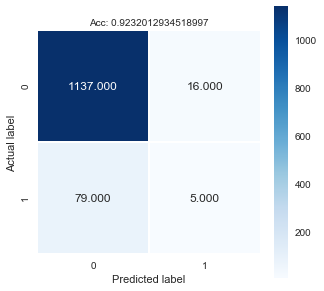

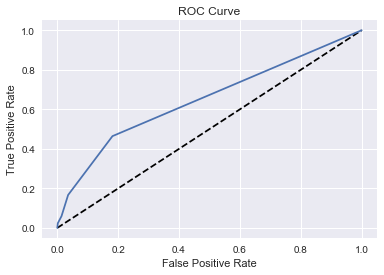

In [221]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import LinearSVC 

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

parameters = {
    'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9],
    #'clf__C': [1, 10, 100],
    }

from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print("Best score: %0.3f" % gs.best_score_)
best_parameters = gs.best_estimator_.get_params()
print("Best parameters set: ",best_parameters)


# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
# def results(y_pred, y_test):
#     from sklearn.metrics import classification_report, confusion_matrix
#     print (classification_report(y_test, y_pred))
    
#     cm = confusion_matrix(y_test, y_pred)
#     df_cm = pd.DataFrame(100*cm/float(cm.sum()))
#     ax = sns.heatmap(df_cm.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
#     ax.set_title("Confusion Matrix - per 100 predictions")
#     ax.set_xlabel('Predicted', fontsize=16)
#     ax.set_ylabel('True', fontsize=16, rotation=90)
#     plt.show()
    

y_pred = gs.predict(X_test) 
# results(y_pred, y)

plot_confusion_matrix(gs,X_test,y_test,y_pred)
roc_curve_plot(gs, X_test, y_test)

### 3.5.2 LogisticRegression

Tuned Logistic Regression Parameters: {'C': 31.622776601683793, 'penalty': 'l1'}
Best score is 0.9371336163331312
[[1150    3]
 [  81    3]]
             precision    recall  f1-score   support

      False       0.93      1.00      0.96      1153
       True       0.50      0.04      0.07        84

avg / total       0.90      0.93      0.90      1237



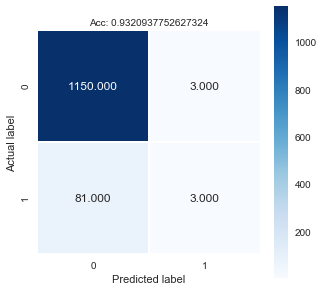

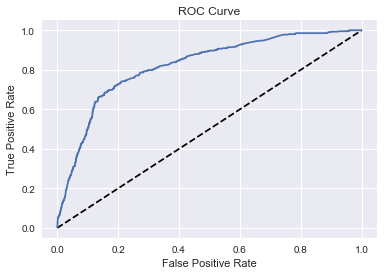

ROC AUC Score: 0.8304113492751828


In [222]:
X = MinMaxScaler().fit_transform(X)


# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
C = np.logspace(0, 4, 10)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# Instantiate a logistic regression classifier: logreg
# logreg = LogisticRegression(class_weight='balanced')
logreg = LogisticRegression()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=kf, n_jobs=-1)

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Predict
y_pred = logreg_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

# Confusion Matrix
plot_confusion_matrix(logreg_cv,X_test,y_test,y_pred)

# ROC Curve
roc_curve_plot(logreg_cv, X, y)

# 
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

print("ROC AUC Score:" ,roc_auc_score(y_test,y_pred_prob))

### 3.5.3 DecisionTree

Current Bests: 

class_weight = None:
TN -> 67:{'criterion': 'gini', 'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 8}

class_weight = 'balanced'
TN -> 71:{'criterion': 'gini', 'max_depth': 1, 'max_features': 7, 'min_samples_leaf': 6}


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 4}
Best score is 0.9237921972912877
[[767 386]
 [ 31  53]]
             precision    recall  f1-score   support

      False       0.96      0.67      0.79      1153
       True       0.12      0.63      0.20        84

avg / total       0.90      0.66      0.75      1237



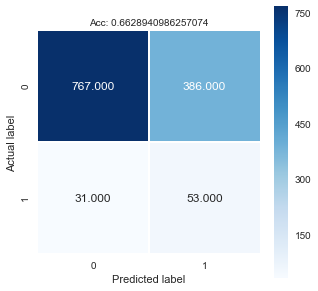

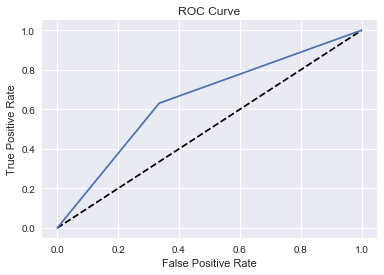

,importance,labels
8,1.0,is_profesion
0,0.0,is_apellido1
33,0.0,loc_provincia_Concepcion
25,0.0,loc_comuna_Concepción
26,0.0,loc_comuna_Coronel


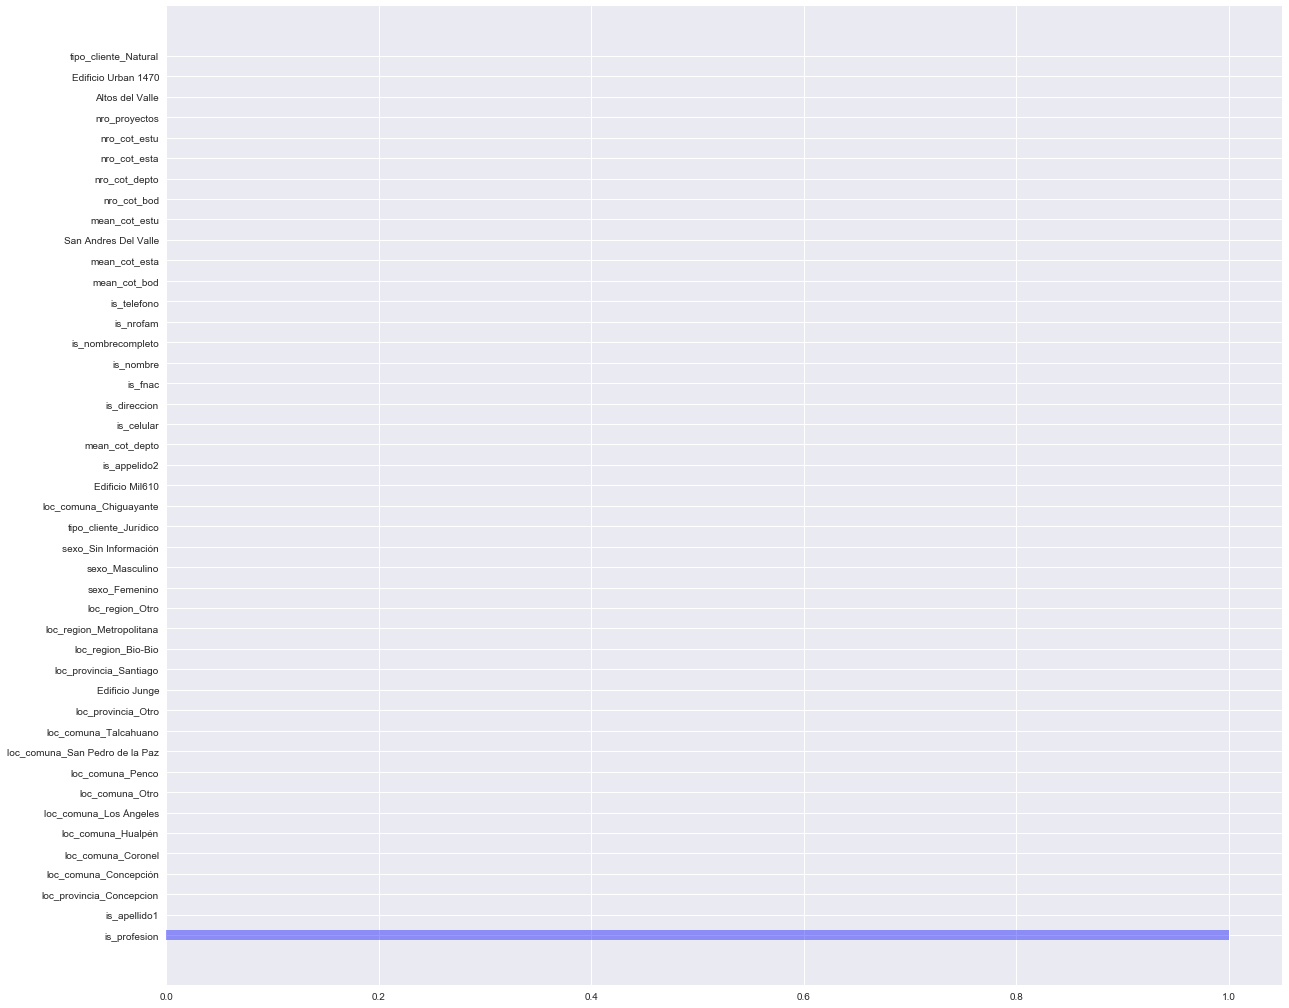

In [223]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,5,10,15,20, None],
              "max_features": randint(1, 30),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

param_dist = {
    "max_depth": range(1,20),
    "max_features":range(1,30),
    "min_samples_leaf": range(1,10),
    "criterion": ["gini", "entropy"]
}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier(class_weight='balanced')

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
# tree_cv = RandomizedSearchCV(tree, param_dist, cv=kf)
tree_cv = GridSearchCV(tree, param_dist, cv=kf, n_jobs=-1)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Predict
y_pred = tree_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

# Confusion Matrix
plot_confusion_matrix(tree_cv, X_test, y_test, y_pred)

# ROC Curve
roc_curve_plot(tree_cv, X_test, y_test)

# Feature Importance
plot_importance_graph(tree_cv)

### 3.5.4 RandomForest

Current Bests:

class_weight = None
TN -> 81: (bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
            
            
TN -> 303: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is 0.888745148771022

Tuned Decision Tree Parameters: {'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Best score is 0.9357186173438448
[[1153    0]
 [  82    2]]
             precision    recall  f1-score   support

      False       0.93      1.00      0.97      1153
       True       1.00      0.02      0.05        84

avg / total       0.94      0.93      0.90      1237



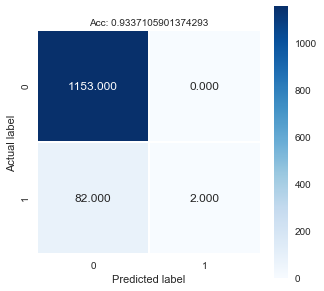

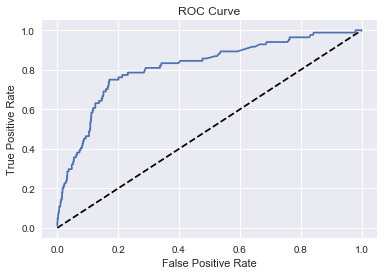

,importance,labels
3,0.158109,is_direccion
4,0.103619,is_fnac
15,0.099978,nro_cot_depto
21,0.080220,San Andres Del Valle
8,0.050472,is_profesion


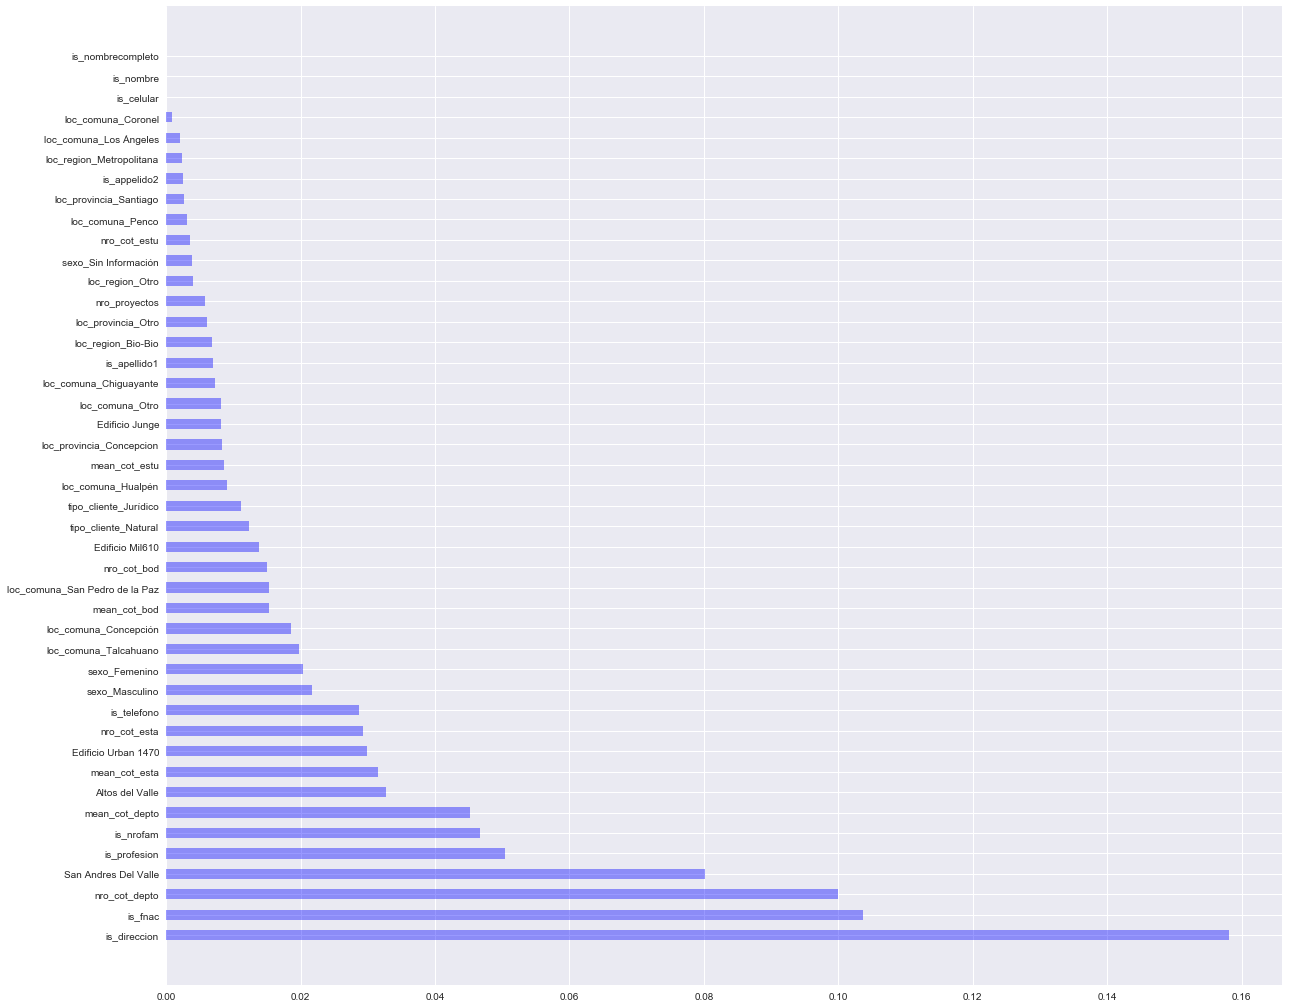

In [225]:
# Setup the parameters and distributions to sample from: param_dist

param_dist = {
    "max_depth": range(1,20),
    "max_features":range(1,30),
    "min_samples_leaf": range(1,10),
    "criterion": ["gini", "entropy"]
}

param_dist = {"max_depth": [3,5,10,15,20, None],
              "max_features": randint(1, 30),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

param_grid = {"max_depth": [3,None],
              'max_features': ['auto', 'sqrt', 'log2'],
              "min_samples_split": list(range(2,10)),
              "min_samples_leaf": list(range(1,10)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
             "n_estimators":list(range(20,100,10))
}

# Instantiate a Decision Tree classifier: tree
rf = RandomForestClassifier()

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
rf_cv = RandomizedSearchCV(rf, param_grid, cv=kf, n_jobs=-1)
# rf_cv = GridSearchCV(rf, param_grid, cv=kf, n_jobs=-1)

# Fit it to the data
rf_cv.fit(X_train,y_train)

# Predict
y_pred = rf_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

# Confusion Matrix
plot_confusion_matrix(rf_cv, X_test, y_test, y_pred)

# ROC Curve
roc_curve_plot(rf_cv, X_test, y_test)

# Feature Importance
plot_importance_graph(rf_cv)

# RandomForest with Params 1

[[1707   22]
 [ 111   16]]
             precision    recall  f1-score   support

      False       0.94      0.99      0.96      1729
       True       0.42      0.13      0.19       127

avg / total       0.90      0.93      0.91      1856



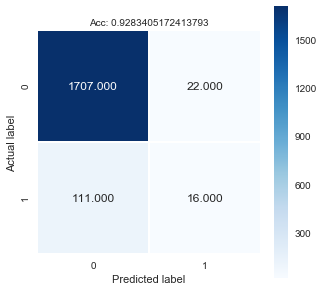

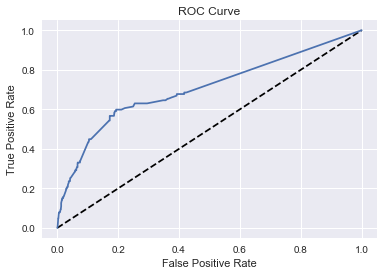

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [10]:
rf = RandomForestClassifier(bootstrap=True,
                            criterion='entropy', 
                            max_depth=None, 
                            max_features=3, 
                            min_samples_leaf=1, 
                            min_samples_split=2,
                           
                           )

# rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='entropy', max_depth=None, 
#                             max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                             min_impurity_split=None, min_samples_leaf=3, min_samples_split=10, 
#                             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-2, 
#                             oob_score=False, random_state=None, verbose=0, warm_start=False)

# Fit it to the data
rf.fit(X_train,y_train)

# Predict
y_pred = rf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(rf, X_test, y_test, y_pred)

# ROC Curve
roc_curve_plot(rf, X_test, y_test)

# Feature Importance
plot_importance_graph(rf)

# RandomForest with Params 2

[[1659   70]
 [ 103   24]]
             precision    recall  f1-score   support

      False       0.94      0.96      0.95      1729
       True       0.26      0.19      0.22       127

avg / total       0.89      0.91      0.90      1856



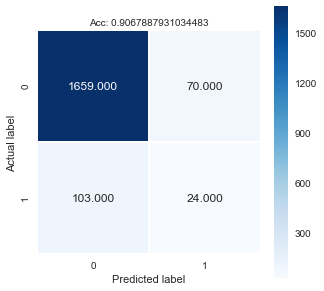

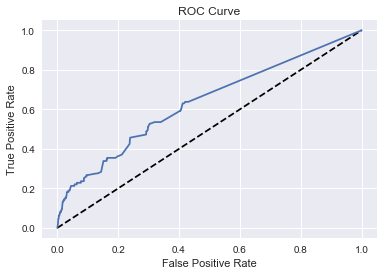

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(bootstrap=True,criterion='entropy',
                            max_depth=None, max_features=3, 
                            min_samples_leaf=1, 
                            min_samples_split=2,
                            random_state=1,
                            class_weight='balanced'
                           )
# rf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=None, 
#                             max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                             min_impurity_split=None, min_samples_leaf=3, min_samples_split=10, 
#                             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-2, 
#                             oob_score=False, random_state=None, verbose=0, warm_start=False)


# Fit it to the data
rf.fit(X_train,y_train)

# Predict
y_pred = rf.predict(X_test)


# Confusion Matrix
plot_confusion_matrix(rf, X_test, y_test, y_pred)

# ROC Curve
roc_curve_plot(rf, X_test, y_test)

# Feature Importance
plot_importance_graph(rf)

Best Params:  {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 14, 'max_depth': 25, 'criterion': 'entropy', 'bootstrap': True}
Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=25, max_features=14,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy:  0.9412715517241379
[[1723    6]
 [ 118    9]]
             precision    recall  f1-score   support

      False       0.94      1.00      0.97      1729
       True       0.60      0.07      0.13       127

avg / total       0.91      0.93      0.91      1856



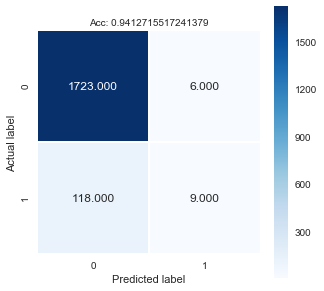

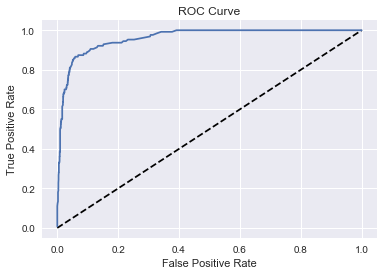

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [25]:
param_grid = {
    "max_depth": randint(1,30),
    "max_features":randint(1,40),
    "min_samples_leaf": randint(1,20),
    "criterion": ["gini", "entropy"],
    "min_samples_split": randint(2,20),
    "n_estimators":[20,30,40,50,60,70,80,90,100],
    "bootstrap": [True, False],
}

randomForest = RandomForestClassifier(class_weight='balanced')

# Stratified
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomSearch
randomForest_cv = RandomizedSearchCV(randomForest, param_dist, cv=kf)

# Grid Search
# randomForest_cv = GridSearchCV(randomForest, param_grid, cv=kf, n_jobs=-1)

# Train
randomForest_cv.fit(X, y)

print("Best Params: ", randomForest_cv.best_params_)
print('Best Estimator: ', randomForest_cv.best_estimator_)

model = randomForest_cv.best_estimator_
# Make predictions
predictions = model.predict(X_test)

probs = model.predict_proba(X_test)
# display(predictions)

score = model.score(X_test, y_test)
print("Accuracy: ", score)

plot_confusion_matrix(model, X_test, y_test, y_pred)

roc_curve_plot(model, X_test, y_test)

plot_importance_graph(model)

### 3.5.5 Logistic with Params

[[1723    6]
 [ 118    9]]
             precision    recall  f1-score   support

      False       0.94      1.00      0.97      1729
       True       0.60      0.07      0.13       127

avg / total       0.91      0.93      0.91      1856



C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


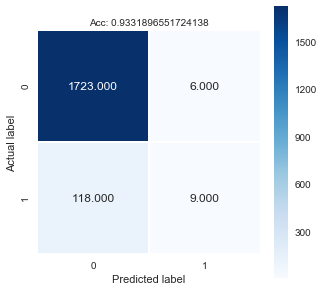

In [16]:
# {'C': 31.622776601683793, 'penalty': 'l2'}

# Instantiate a logistic regression classifier: logreg
model = LogisticRegression(C=31.62277, n_jobs=-1)

# Fit it to the data
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(model,X_test,y_test,y_pred)

### 3.5.6 SVM

In [ ]:
from sklearn import svm, grid_search

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)

print(grid_search.best_params_)


y_pred = grid_search.predict(X)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_search.best_params_)) 
print("Best score is {}".format(grid_search.best_score_))

plot_confusion_matrix(grid_search,X , y, y_pred)